In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# f = lambda x, y: 4 ** 3 + y ** 2 - 6 * x * y - y + 7
# START_X = 4
# START_Y = 4
# EPSILON = 0.00001

In [13]:
# def func(x, y):
#     return 2.5 * (x * x - y) * (x * x - y) + (1 - x) * (1 - x)

In [14]:
def func(x, y):
    return 4 * x ** 3 + y ** 2 - 6 * x * y - y + 7

In [15]:
# xb = xb0 = x0 = [-0.5, 1]
# wo1 = np.array([1, 0])
# wo2 = np.array([0, 1])
# e = 0.5
# beta = 0.5
# n = 2
# E = 0.01

In [16]:
xb = xb0 = x0 = [4, 4]
wo1 = np.array([1, 0])
wo2 = np.array([0, 1])
e = 0.5
beta = 0.5
n = 2
E = 0.00001

In [17]:
def hook_jeeves(x0, xb, e, wo1, wo2, n, E, beta):
    i = 0
    path = [x0.copy()]

    while True:
        j = 1
        f0 = func(x0[0], x0[1])
        fb = func(xb[0], xb[1])

        x_next = x0 + e * wo1
        f = func((x_next[0]), x_next[1])

        if f < f0:
            f0 = f
        else:
            x_next = x_next - 2 * e * wo1
            f = func((x_next[0]), x_next[1])

            if f < f0:
                f0 = f
            else:
                x_next = x_next + e * wo1

        if j != n:
            j += 1

            x_next = x_next + e * wo2
            f = func((x_next[0]), x_next[1])

            if f < f0:
                f0 = f
            else:
                x_next = x_next - 2 * e * wo2
                f = func((x_next[0]), x_next[1])

                if f < f0:
                    f0 = f
                else:
                    x_next = x_next + e * wo2

            if fb > f0:
                xb0 = xb
                xb = x_next
                x0 = 2 * xb - xb0
                # print(f"Etap roboczy: {x0} {xb} {xb0}\n{func(*x0)} {func(*xb)} {func(*xb0)}")
            elif e > E:
                e = beta * e
                x0 = xb

        path.append(x_next.copy())
        i += 1
        # print(x_next)
        
        if i in [3, 5, 7, 9, 12, 15]:
            print(i, x_next[0], x_next[1])
        
        if e < E:
            return x_next[0], x_next[1], i, path

In [18]:
epsilon = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

for E in epsilon:
    x, y, iterations, path = hook_jeeves(x0, xb, e, wo1, wo2, n, E, beta)
    print(round(x, 6), round(y, 6), iterations)

3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
1.75 5.75 8
3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
1.65625 5.5 17
3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
1.652344 5.457031 22
3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
1.651367 5.454102 28
3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
1.651382 5.454163 33
3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
1.651386 5.454159 38


In [19]:
x, y, iterations, path = hook_jeeves(x0, xb, e, wo1, wo2, n, E, beta)
path = np.array(path)

print("x:", x)
print("y:", y)
print("Iteracje:", iterations)

3 2.0 6.5
5 1.75 6.25
7 1.5 5.0
9 1.6875 5.6875
12 1.625 5.25
15 1.640625 5.421875
x: 1.6513862609863281
y: 5.454158782958984
Iteracje: 38


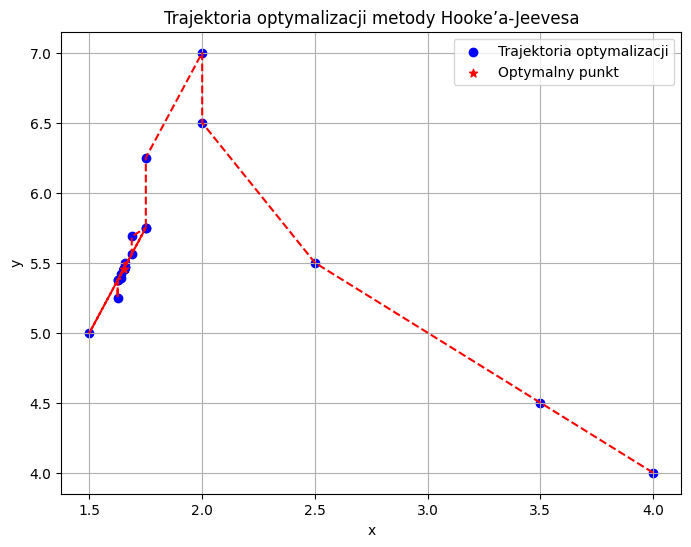

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(path[:, 0], path[:, 1], c='blue', label='Trajektoria optymalizacji')
plt.plot(path[:, 0], path[:, 1], 'r--')
plt.scatter([x], [y], c='red', marker='*', label='Optymalny punkt')
plt.title('Trajektoria optymalizacji metody Hooke’a-Jeevesa')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()